# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv('Ad_click_dataset.csv')

# Calculate the CTR 

In [3]:
df['CTR'] = df['Clicked on Ad'].mean()

# Printing the information from the dataset

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,0.4917
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,0.4917
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,0.4917
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,0.4917
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,0.4917


In [5]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1,0.4917
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0,0.4917
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0,0.4917
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1,0.4917
9999,46.61,43.0,60575.99,198.45,Optimized upward-trending productivity,Port Jeffrey,Male,Northern Mariana Islands,2016-04-03 21:13:46,1,0.4917


In [6]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR
1780,43.49,37.0,67132.46,217.37,Cross-group non-volatile secured line,Jordantown,Female,Egypt,2016-04-07 20:34:42,0,0.4917
6584,36.08,45.0,61526.25,174.88,Secured 24hour policy,Kristinfurt,Female,Micronesia,2016-02-11 04:37:34,1,0.4917
4552,82.07,43.0,73538.09,157.04,Polarized tangible collaboration,Port Jeffrey,Female,Bangladesh,2016-04-17 21:39:11,1,0.4917
4783,88.12,26.0,64564.07,227.63,Synergized intangible open system,Lake Edward,Male,Jersey,2016-03-08 18:00:43,0,0.4917
5037,51.87,38.0,42760.22,124.32,Up-sized bi-directional infrastructure,Jamesville,Female,Macedonia,2016-03-11 00:05:48,0,0.4917
2810,50.63,36.0,32549.95,131.55,Cloned object-oriented benchmark,Jordantown,Male,Liechtenstein,2016-07-08 03:47:41,1,0.4917
840,83.71,45.0,31092.93,174.88,Secured 24hour policy,Wintersfort,Female,Tonga,2016-07-05 18:59:45,1,0.4917
9820,80.51,45.0,70053.27,174.88,Secured 24hour policy,Kristinfurt,Female,Taiwan,2016-01-07 23:02:43,1,0.4917
7735,55.60,54.0,57806.03,162.08,Profit-focused attitude-oriented task-force,Westshire,Female,Czech Republic,2016-01-08 09:32:26,1,0.4917
2007,68.01,33.0,56782.18,215.18,Front-line fault-tolerant intranet,West Connor,Female,Indonesia,2016-06-17 20:18:27,0,0.4917


In [7]:
modee = df.mode()
print(modee)

   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                      55.6  35.0     57868.44                207.17   

                Ad Topic Line          City  Gender    Country  \
0  Cloned explicit middleware  Hubbardmouth  Female  Australia   

             Timestamp  Clicked on Ad     CTR  
0  2016-03-11 00:05:48              0  0.4917  


# Printing the information from the dataset

In [8]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
df['Daily Time Spent Bucket'] = pd.qcut(df['Daily Time Spent on Site'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR,Age Group,Daily Time Spent Bucket
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,0.4917,31-40,Medium-High
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,0.4917,31-40,Low
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,0.4917,21-30,Low
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,0.4917,21-30,Medium-High
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,0.4917,21-30,Medium-Low


# Encode categorical variables

In [10]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Country'] = le.fit_transform(df['Country'])
df['Ad Topic Line'] = le.fit_transform(df['Ad Topic Line'])

In [11]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR,Age Group,Daily Time Spent Bucket
0,62.26,32.0,69481.85,172.83,96,Lisafort,1,174,2016-06-09 21:43:05,0,0.4917,31-40,Medium-High
1,41.73,31.0,61840.26,207.17,301,West Angelabury,1,166,2016-01-16 17:56:05,0,0.4917,31-40,Low
2,44.40,30.0,57877.15,172.83,484,Reyesfurt,0,71,2016-06-29 10:50:45,0,0.4917,21-30,Low
3,59.88,28.0,56180.93,207.17,24,New Michael,0,205,2016-06-21 14:32:32,0,0.4917,21-30,Medium-High
4,49.21,30.0,54324.73,201.58,484,West Richard,0,149,2016-07-21 10:54:35,1,0.4917,21-30,Medium-Low


In [12]:
# Prepare features for modeling

In [13]:
features = ['Age', 'Area Income', 'Daily Time Spent on Site', 'Gender', 'Country', 'Ad Topic Line']
X = df[features]
y = df['Clicked on Ad']

In [31]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR,Age Group,Daily Time Spent Bucket,CTR_by_Country,CTR_by_Age_Group,CTR_by_Gender
0,62.26,32.0,69481.85,172.83,96,Lisafort,1,174,2016-06-09 21:43:05,0,0.4917,31-40,Medium-High,0.000000,0.409466,0.464965
1,41.73,31.0,61840.26,207.17,301,West Angelabury,1,166,2016-01-16 17:56:05,0,0.4917,31-40,Low,0.007692,0.409466,0.464965
2,44.40,30.0,57877.15,172.83,484,Reyesfurt,0,71,2016-06-29 10:50:45,0,0.4917,21-30,Low,0.000000,0.263231,0.514695
3,59.88,28.0,56180.93,207.17,24,New Michael,0,205,2016-06-21 14:32:32,0,0.4917,21-30,Medium-High,0.076923,0.263231,0.514695
4,49.21,30.0,54324.73,201.58,484,West Richard,0,149,2016-07-21 10:54:35,1,0.4917,21-30,Medium-Low,0.035714,0.263231,0.514695


# Split the data

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize models

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

In [17]:
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Logistic Regression": lr_model
}

In [18]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


Random Forest Results:
Accuracy: 83.00%
Confusion Matrix:
[[644 120]
 [135 601]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       764
           1       0.83      0.82      0.82       736

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500


Gradient Boosting Results:
Accuracy: 81.87%
Confusion Matrix:
[[656 108]
 [164 572]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       764
           1       0.84      0.78      0.81       736

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500


Logistic Regression Results:
Accuracy: 73.00%
Confusion Matrix:
[[595 169]
 [236 500]]
Classification Report:
              precisi

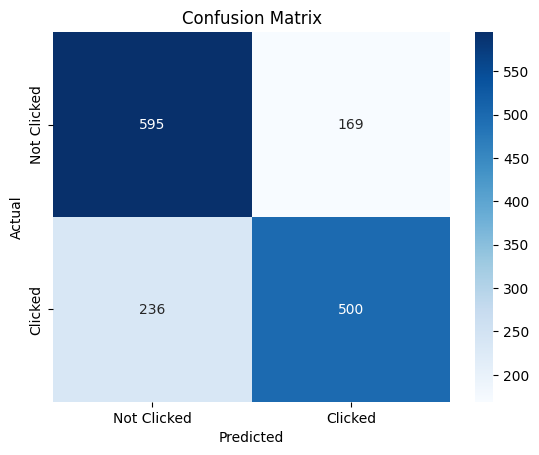

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance for Random Forest and Gradient Boosting

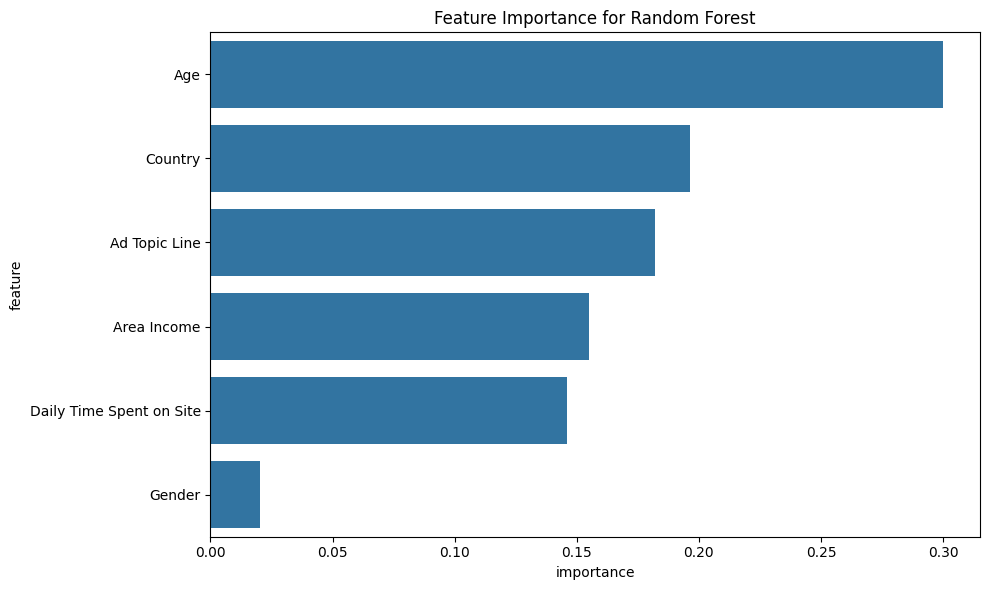


Random Forest Feature Importance:
                    feature  importance
0                       Age    0.300106
4                   Country    0.196555
5             Ad Topic Line    0.182083
1               Area Income    0.155198
2  Daily Time Spent on Site    0.145934
3                    Gender    0.020125


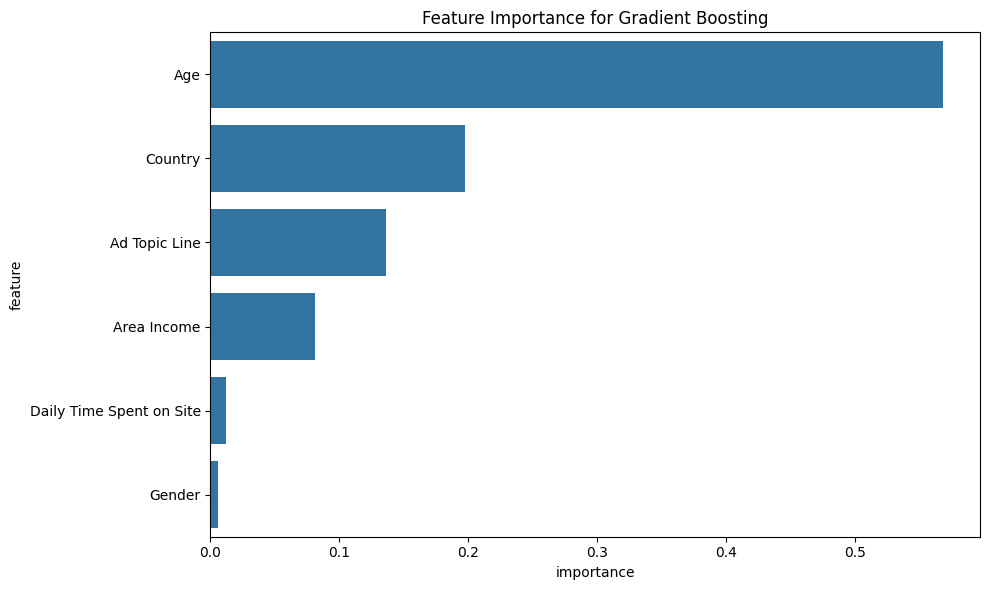


Gradient Boosting Feature Importance:
                    feature  importance
0                       Age    0.568230
4                   Country    0.197571
5             Ad Topic Line    0.136012
1               Area Income    0.080712
2  Daily Time Spent on Site    0.011879
3                    Gender    0.005595


In [20]:
for name in ["Random Forest", "Gradient Boosting"]:
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': models[name].feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance for {name}')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{name} Feature Importance:")
    print(feature_importance)

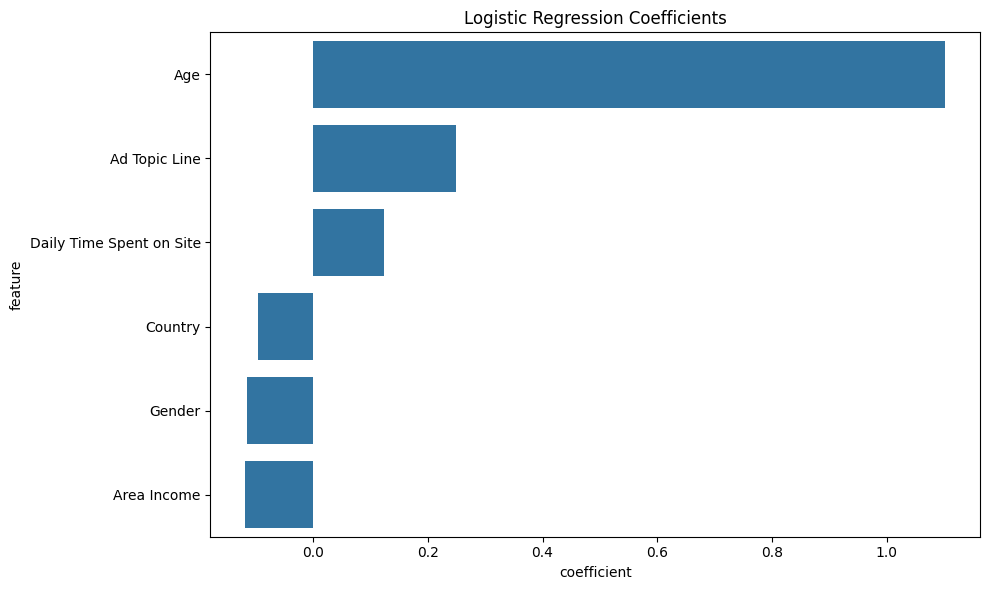


Logistic Regression Coefficients:
                    feature  coefficient
0                       Age     1.101882
5             Ad Topic Line     0.248635
2  Daily Time Spent on Site     0.123791
4                   Country    -0.096502
3                    Gender    -0.115306
1               Area Income    -0.118181


In [21]:
lr_coefficients = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=lr_coefficients)
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

print("\nLogistic Regression Coefficients:")
print(lr_coefficients)

# ROC Curve comparison

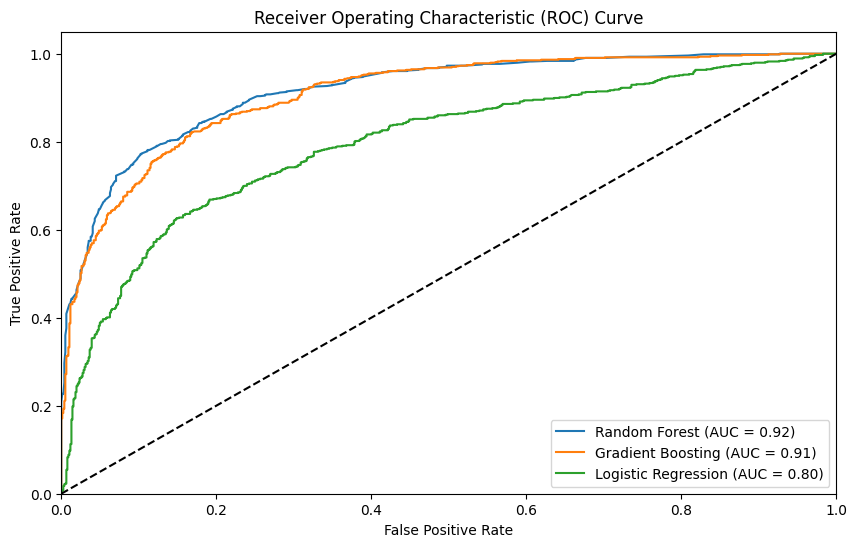

In [22]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
df['CTR_by_Country'] = df.groupby('Country')['Clicked on Ad'].transform('mean')
df['CTR_by_Age_Group'] = df.groupby('Age Group')['Clicked on Ad'].transform('mean')
df['CTR_by_Gender'] = df.groupby('Gender')['Clicked on Ad'].transform('mean')

print("\nTop 5 Countries by CTR:")
print(df.groupby('Country')['CTR_by_Country'].first().sort_values(ascending=False).head())

print("\nCTR by Age Group:")
print(df.groupby('Age Group')['CTR_by_Age_Group'].first().sort_values(ascending=False))

print("\nCTR by Gender:")
print(df.groupby('Gender')['CTR_by_Gender'].first())


Top 5 Countries by CTR:
Country
185    1.0
135    1.0
120    1.0
165    1.0
170    1.0
Name: CTR_by_Country, dtype: float64

CTR by Age Group:
Age Group
41-50    0.849242
51-60    0.844479
31-40    0.409466
21-30    0.263231
0-20     0.211538
60+           NaN
Name: CTR_by_Age_Group, dtype: float64

CTR by Gender:
Gender
0    0.514695
1    0.464965
Name: CTR_by_Gender, dtype: float64


In [33]:
### import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming models, scalers, and encoders from previous code are already defined
# Define encoders used in the model training
label_encoders = {
    'Gender': le,
    'Country': le,
    'Ad Topic Line': le
}

def safe_transform(encoder, value):
    try:
        return encoder.transform([value])[0]
    except:
        # Handle unseen labels by assigning a default value or encoding it as a new category
        return -1  # Assign a default value for unseen categories

def predict_ad_click(daily_time_spent, age, area_income, daily_internet_usage, gender, country, ad_topic_line):
    # Create a DataFrame for the user input
    input_data = pd.DataFrame({
        'Daily Time Spent on Site': [daily_time_spent],
        'Age': [age],
        'Area Income': [area_income],
        'Daily Internet Usage': [daily_internet_usage],
        'Gender': [gender],
        'Country': [country],
        'Ad Topic Line': [ad_topic_line]
    })
    
    # Encode categorical variables safely
    for column in ['Gender', 'Country', 'Ad Topic Line']:
        input_data[column] = input_data[column].apply(lambda x: safe_transform(label_encoders[column], x))
    
    # Select features
    X_input = input_data[['Age', 'Area Income', 'Daily Time Spent on Site', 'Gender', 'Country', 'Ad Topic Line']]
    
    # Scale features
    X_input_scaled = scaler.transform(X_input)
    
    # Make predictions
    predictions = {name: model.predict(X_input_scaled) for name, model in models.items()}
    prediction_proba = {name: model.predict_proba(X_input_scaled)[:, 1] for name, model in models.items()}
    
    results = {}
    for name in models.keys():
        results[name] = {
            "Prediction": predictions[name][0],
            "Probability of Click": prediction_proba[name][0]
        }
    
    return results

# Example usage
if __name__ == "__main__":
    daily_time_spent = float(input("Enter Daily Time Spent on Site: "))
    age = float(input("Enter Age: "))
    area_income = float(input("Enter Area Income: "))
    daily_internet_usage = float(input("Enter Daily Internet Usage: "))
    gender = input("Enter Gender (Male/Female): ")
    country = input("Enter Country: ")
    ad_topic_line = input("Enter Ad Topic Line: ")
    
    results = predict_ad_click(daily_time_spent, age, area_income, daily_internet_usage, gender, country, ad_topic_line)
    
    for model_name, result in results.items():
        print(f"\n{model_name} Prediction Results:")
        print(f"Prediction: {'Clicked' if result['Prediction'] == 1 else 'Not Clicked'}")
        print(f"Probability of Click: {result['Probability of Click']:.2f}")



Enter Daily Time Spent on Site:  49.21
Enter Age:  30.0
Enter Area Income:  54324.73
Enter Daily Internet Usage:  201.58
Enter Gender (Male/Female):  Female
Enter Country:  149	
Enter Ad Topic Line:  484



Random Forest Prediction Results:
Prediction: Clicked
Probability of Click: 0.57

Gradient Boosting Prediction Results:
Prediction: Clicked
Probability of Click: 0.63

Logistic Regression Prediction Results:
Prediction: Not Clicked
Probability of Click: 0.31


In [ ]:
41.73	31.0	61840.26	207.17	301	West Angelabury	1	166	2016-01-16 17:56:05	0	0.4917	31-40	